In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
filename = "D:\\BeCode\\Projects\\immo-eliza-ml\\properties.csv"
df = pd.read_csv(filename)
df.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [3]:
import pandas as pd
import numpy as np

filename = "D:\\BeCode\\Projects\\immo-eliza-ml\\properties.csv"
df = pd.read_csv(filename)

# Remove duplicates
df = df.drop_duplicates()

# Remove white spaces  (leading, trailing, or extra spaces between words)
df = df.apply(lambda x: x.str.strip().str.replace('\s+', ' ', regex=True) if x.dtype == "object" else x)

# fill None when the value is empty
#df = df.fillna('NaN')

# Ensure the 'price' column contains only numeric values, setting non-numeric entries to NaN
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

# Save the cleaned data to a new CSV file
#cleaned_file_path = 'cleaned_properties.csv'
#df.to_csv(cleaned_file_path, index=False)


In [4]:
df.head()

,id,price,property_type,subproperty_type,region,province,locality,zip_code,latitude,longitude,...,fl_garden,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,epc,heating_type,fl_double_glazing,cadastral_income
0,34221000,225000.0,APARTMENT,APARTMENT,Flanders,Antwerp,Antwerp,2050,51.217172,4.379982,...,0,0.0,0,0,MISSING,231.0,C,GAS,1,922.0
1,2104000,449000.0,HOUSE,HOUSE,Flanders,East Flanders,Gent,9185,51.174944,3.845248,...,0,0.0,0,0,MISSING,221.0,C,MISSING,1,406.0
2,34036000,335000.0,APARTMENT,APARTMENT,Brussels-Capital,Brussels,Brussels,1070,50.842043,4.334543,...,0,0.0,0,1,AS_NEW,NaN,MISSING,GAS,0,NaN
3,58496000,501000.0,HOUSE,HOUSE,Flanders,Antwerp,Turnhout,2275,51.238312,4.817192,...,0,0.0,0,1,MISSING,99.0,A,MISSING,0,NaN
4,48727000,982700.0,APARTMENT,DUPLEX,Wallonia,Walloon Brabant,Nivelles,1410,NaN,NaN,...,1,142.0,0,0,AS_NEW,19.0,A+,GAS,0,NaN


In [5]:
df.dtypes

id                                  int64
price                             float64
property_type                      object
subproperty_type                   object
region                             object
province                           object
locality                           object
zip_code                            int64
latitude                          float64
longitude                         float64
construction_year                 float64
total_area_sqm                    float64
surface_land_sqm                  float64
nbr_frontages                     float64
nbr_bedrooms                      float64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
fl_terrace                          int64
terrace_sqm                       float64
fl_garden                           int64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone                      

In [6]:
nan_count = df.isna().sum()
print("Count NaN values of column wise:\n", nan_count)

Count NaN values of column wise:
 id                                    0
price                                 0
property_type                         0
subproperty_type                      0
region                                0
province                              0
locality                              0
zip_code                              0
latitude                          14098
longitude                         14098
construction_year                 33391
total_area_sqm                     7615
surface_land_sqm                  36256
nbr_frontages                     26346
nbr_bedrooms                          0
equipped_kitchen                      0
fl_furnished                          0
fl_open_fire                          0
fl_terrace                            0
terrace_sqm                       13140
fl_garden                             0
garden_sqm                         2939
fl_swimming_pool                      0
fl_floodzone                          0
state_

In [7]:
# List of columns you want to drop
columns_to_drop = ['id', 'locality','province','subproperty_type','nbr_frontages', 'cadastral_income', 'epc', 'surface_land_sqm','fl_terrace','fl_garden','latitude','longitude']

# Drop columns if they exist in the DataFrame
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

In [8]:
df.columns

Index(['price', 'property_type', 'region', 'zip_code', 'construction_year',
       'total_area_sqm', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'terrace_sqm', 'garden_sqm', 'fl_swimming_pool',
       'fl_floodzone', 'state_building', 'primary_energy_consumption_sqm',
       'heating_type', 'fl_double_glazing'],
      dtype='object')

In [9]:
df.dtypes

price                             float64
property_type                      object
region                             object
zip_code                            int64
construction_year                 float64
total_area_sqm                    float64
nbr_bedrooms                      float64
equipped_kitchen                   object
fl_furnished                        int64
fl_open_fire                        int64
terrace_sqm                       float64
garden_sqm                        float64
fl_swimming_pool                    int64
fl_floodzone                        int64
state_building                     object
primary_energy_consumption_sqm    float64
heating_type                       object
fl_double_glazing                   int64
dtype: object

In [10]:
df.head()

,price,property_type,region,zip_code,construction_year,total_area_sqm,nbr_bedrooms,equipped_kitchen,fl_furnished,fl_open_fire,terrace_sqm,garden_sqm,fl_swimming_pool,fl_floodzone,state_building,primary_energy_consumption_sqm,heating_type,fl_double_glazing
0,225000.0,APARTMENT,Flanders,2050,1963.0,100.0,2.0,INSTALLED,0,0,5.0,0.0,0,0,MISSING,231.0,GAS,1
1,449000.0,HOUSE,Flanders,9185,NaN,NaN,2.0,MISSING,0,0,0.0,0.0,0,0,MISSING,221.0,MISSING,1
2,335000.0,APARTMENT,Brussels-Capital,1070,NaN,142.0,3.0,INSTALLED,0,0,NaN,0.0,0,1,AS_NEW,NaN,GAS,0
3,501000.0,HOUSE,Flanders,2275,2024.0,187.0,3.0,MISSING,0,0,0.0,0.0,0,1,MISSING,99.0,MISSING,0
4,982700.0,APARTMENT,Wallonia,1410,2022.0,169.0,2.0,HYPER_EQUIPPED,0,0,20.0,142.0,0,0,AS_NEW,19.0,GAS,0


In [11]:
cols_with_nans = [x for x in df if df[x].isnull().sum()>0]
df[cols_with_nans].isnull().sum()
print (cols_with_nans)

['construction_year', 'total_area_sqm', 'terrace_sqm', 'garden_sqm', 'primary_energy_consumption_sqm']


In [12]:
selected_columns = ['construction_year', 'total_area_sqm', 'terrace_sqm', 'garden_sqm', 'primary_energy_consumption_sqm']
nan_count = df[selected_columns].isna().sum()
print("Count NaN values of particular column:\n", nan_count)

Count NaN values of particular column:
 construction_year                 33391
total_area_sqm                     7615
terrace_sqm                       13140
garden_sqm                         2939
primary_energy_consumption_sqm    26567
dtype: int64


In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer

numeric_features = df.select_dtypes(include=['int64', 'float64']).columns

# Impute missing values for numerical columns
numeric_imputer = SimpleImputer(strategy='median')
df[numeric_features] = numeric_imputer.fit_transform(df[numeric_features])

#imputed_file_path = 'properties_imputed.csv'
#df.to_csv(imputed_file_path, index=False)

In [14]:
# List of categorical columns with NaNs that you want to fill with 'Unknown'
categorical_features = df.select_dtypes(include=['object']).columns

for col in categorical_features:
    df[col] = df[col].fillna('Unknown')

print("Data after filling NaNs with 'Unknown'")
print(df[categorical_features].head())

Data after filling NaNs with 'Unknown'
  property_type            region equipped_kitchen state_building heating_type
0     APARTMENT          Flanders        INSTALLED        MISSING          GAS
1         HOUSE          Flanders          MISSING        MISSING      MISSING
2     APARTMENT  Brussels-Capital        INSTALLED         AS_NEW          GAS
3         HOUSE          Flanders          MISSING        MISSING      MISSING
4     APARTMENT          Wallonia   HYPER_EQUIPPED         AS_NEW          GAS


In [15]:
from sklearn.preprocessing import OneHotEncoder

encoded_df = df[['property_type','region','equipped_kitchen','state_building','heating_type']]
# create encoder object
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

new_columns = encoder.fit_transform(encoded_df)
df = pd.concat([df, new_columns], axis=1).drop(columns=['property_type','region','equipped_kitchen','state_building','heating_type'])
df.columns

Index(['price', 'zip_code', 'construction_year', 'total_area_sqm',
       'nbr_bedrooms', 'fl_furnished', 'fl_open_fire', 'terrace_sqm',
       'garden_sqm', 'fl_swimming_pool', 'fl_floodzone',
       'primary_energy_consumption_sqm', 'fl_double_glazing',
       'property_type_APARTMENT', 'property_type_HOUSE',
       'region_Brussels-Capital', 'region_Flanders', 'region_MISSING',
       'region_Wallonia', 'equipped_kitchen_HYPER_EQUIPPED',
       'equipped_kitchen_INSTALLED', 'equipped_kitchen_MISSING',
       'equipped_kitchen_NOT_INSTALLED', 'equipped_kitchen_SEMI_EQUIPPED',
       'equipped_kitchen_USA_HYPER_EQUIPPED', 'equipped_kitchen_USA_INSTALLED',
       'equipped_kitchen_USA_SEMI_EQUIPPED',
       'equipped_kitchen_USA_UNINSTALLED', 'state_building_AS_NEW',
       'state_building_GOOD', 'state_building_JUST_RENOVATED',
       'state_building_MISSING', 'state_building_TO_BE_DONE_UP',
       'state_building_TO_RENOVATE', 'state_building_TO_RESTORE',
       'heating_type_CARBON'

In [16]:
df.dtypes

price                                  float64
zip_code                               float64
construction_year                      float64
total_area_sqm                         float64
nbr_bedrooms                           float64
fl_furnished                           float64
fl_open_fire                           float64
terrace_sqm                            float64
garden_sqm                             float64
fl_swimming_pool                       float64
fl_floodzone                           float64
primary_energy_consumption_sqm         float64
fl_double_glazing                      float64
property_type_APARTMENT                float64
property_type_HOUSE                    float64
region_Brussels-Capital                float64
region_Flanders                        float64
region_MISSING                         float64
region_Wallonia                        float64
equipped_kitchen_HYPER_EQUIPPED        float64
equipped_kitchen_INSTALLED             float64
equipped_kitc

In [17]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

df_features = df.drop(columns=['price'])
columns = df_features.columns

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler to the numeric features
df[columns] = scaler.fit_transform(df[columns])
print(df.head())

      price  zip_code  construction_year  total_area_sqm  nbr_bedrooms  \
0  225000.0 -1.029659          -0.817359       -0.152031     -0.415630   
1  449000.0  1.344346           0.170540       -0.083586     -0.415630   
2  335000.0 -1.355731           0.170540       -0.045561      0.112304   
3  501000.0 -0.954795           1.126571        0.068514      0.112304   
4  982700.0 -1.242604           1.062836        0.022884     -0.415630   

   fl_furnished  fl_open_fire  terrace_sqm  garden_sqm  fl_swimming_pool  ...  \
0      -0.13839     -0.452424    -0.133736   -0.081622         -0.137992  ...   
1      -0.13839     -0.452424    -0.274903   -0.081622         -0.137992  ...   
2      -0.13839     -0.452424    -0.246670   -0.081622         -0.137992  ...   
3      -0.13839     -0.452424    -0.274903   -0.081622         -0.137992  ...   
4      -0.13839     -0.452424     0.289767    0.022664         -0.137992  ...   

   state_building_TO_RENOVATE  state_building_TO_RESTORE  heating_ty

In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price'])  #  'price' is the target variable

y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets to confirm
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (60408, 42)
X_test shape: (15103, 42)
y_train shape: (60408,)
y_test shape: (15103,)


In [19]:
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression class
regressor = LinearRegression()

# Train the model with X_train and y_train
regressor.fit(X_train, y_train)

print(f"Intercept: {regressor.intercept_}")
print(f"Coefficient: {regressor.coef_[0]}")


train_score = regressor.score(X_train, y_train)

print(f"Score of the model on the training data is: {train_score:.2f}")


Intercept: 423188.593474354
Coefficient: 6534.861589308864
Score of the model on the training data is: 0.25


In [20]:
y_pred = regressor.predict(X_test)

test_score = regressor.score(X_test, y_test)

print(f"Score of the model on the test data is: {test_score:.2f}")

Score of the model on the test data is: 0.21


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
#from sklearn.metrics import  r2_score

In [22]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor() # max_depth=5, random_state=42

regressor.fit(X_train, y_train)
# Train the model on the training data
train_score = regressor.score(X_train, y_train)

print("Train Score :", train_score)

y_pred = regressor.predict(X_test)

test_score = regressor.score(X_test, y_test)

print("Test Score:", test_score)



Train Score : 0.9992876988865567
Test Score: 0.391025394406343


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [24]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

forest_regressor = RandomForestRegressor() # n_estimators=100, max_depth=10, random_state=42

# Train the model on the training data
forest_regressor.fit(X_train, y_train)

train_score = forest_regressor.score(X_train, y_train)

print("Train Score :", train_score)

y_pred = forest_regressor.predict(X_test)

test_score = forest_regressor.score(X_test, y_test)

print("Test Score:", test_score)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Train Score : 0.951790818097604
Test Score: 0.7064064822033127
Mean Squared Error: 51082106130.20579
R^2 Score: 0.7064064822033127


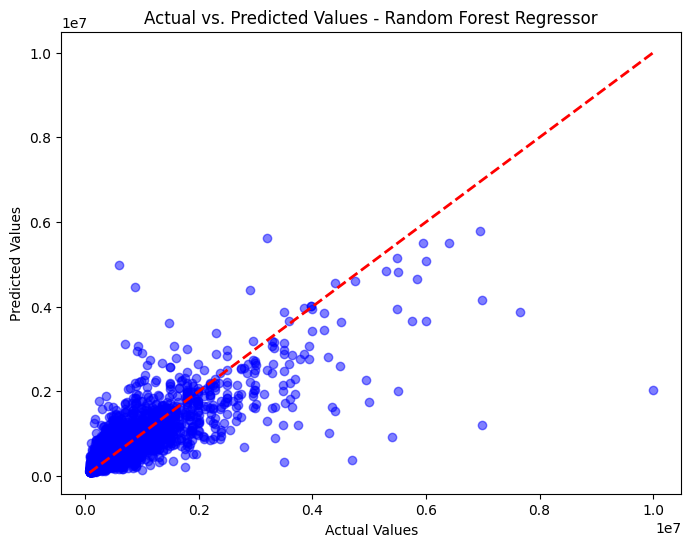

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - Random Forest Regressor")
plt.show()

In [26]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet


In [27]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ElasticNet_Regressor = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Train the model on the training data

ElasticNet_Regressor.fit(X_train, y_train)

train_score = ElasticNet_Regressor.score(X_train, y_train)

print("Train Score :", train_score)

y_pred = ElasticNet_Regressor.predict(X_test)

test_score = ElasticNet_Regressor.score(X_test, y_test)

print("Test Score:", test_score)

Train Score : 0.24754173118024791
Test Score: 0.2233234647978951


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge

In [29]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Bayesian_model = BayesianRidge()

# Train the model on the training data

Bayesian_model.fit(X_train, y_train)

train_score = Bayesian_model.score(X_train, y_train)

print("Train Score :", train_score)

y_pred = Bayesian_model.predict(X_test)

test_score = Bayesian_model.score(X_test, y_test)

print("Test Score:", test_score)

Train Score : 0.24807745089121358
Test Score: 0.21380732032889116


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [31]:
X = df.drop(columns=['price'])
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_regressor = xgb.XGBRegressor(n_estimators=100, max_depth=15, learning_rate=0.5,random_state=42) # n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42
                                                                                                    
# Train the model
xgb_regressor.fit(X_train, y_train)

train_score = xgb_regressor.score(X_train, y_train)
print("Train Score :", train_score)

y_pred = xgb_regressor.predict(X_test)

test_score = xgb_regressor.score(X_test, y_test)
print("Test Score:", test_score)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Train Score : 0.9991527119822692
Test Score: 0.6268829651898166
Mean Squared Error: 64918340548.51373
R^2 Score: 0.6268829651898166


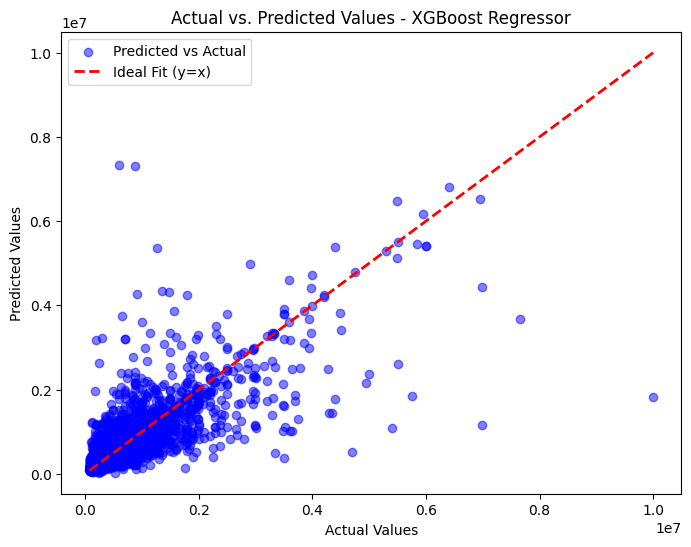

In [32]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Fit (y=x)')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values - XGBoost Regressor")
plt.legend()
plt.show()